In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('movies_dataset.csv')
data.head()

,Unnamed: 0,User_Id,Movie_Name,Rating,Genre
0,0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,3,1,Underground (1995),5.0,Comedy|Drama|War
4,4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance


In [4]:
data.shape

(25000095, 5)

In [6]:
data['Rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

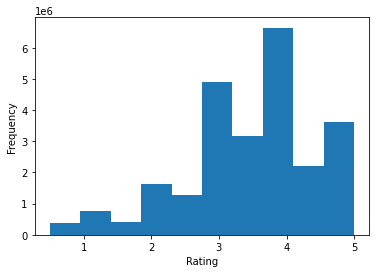

In [5]:
plt.hist(data['Rating'])

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in split.split(data, data['Rating']):
    movies_train_set = data.loc[train_index]
    movies_test_set = data.loc[test_index]

In [19]:
movies_train_set.shape

(15000057, 5)

In [20]:
movies_train_set.head()

,Unnamed: 0,User_Id,Movie_Name,Rating,Genre
21422088,21422088,139195,Leprechaun (1993),0.5,Comedy|Horror
98721,98721,750,Lion (2016),4.5,Drama
20246943,20246943,131612,Léon: The Professional (a.k.a. The Professiona...,4.0,Action|Crime|Drama|Thriller
22670158,22670158,147331,Just Cause (1995),1.0,Mystery|Thriller
21587669,21587669,140376,Up (2009),5.0,Adventure|Animation|Children|Drama


In [21]:
movies_train_set = movies_train_set.drop('Unnamed: 0', axis=1)

In [22]:
# Extract all unique genres
all_genres = set()
for genres in movies_train_set['Genre']:
    all_genres.update(genres.split('|'))

# Print all unique genres
print(all_genres)

{'Musical', 'Documentary', 'Romance', 'Fantasy', 'War', 'Drama', 'Comedy', 'Western', '(no genres listed)', 'IMAX', 'Film-Noir', 'Children', 'Adventure', 'Action', 'Horror', 'Mystery', 'Sci-Fi', 'Animation', 'Crime', 'Thriller'}


In [23]:
#Check if all the genres present in train set are in test set
# Extract all unique genres
all_genres = set()
for genres in movies_test_set['Genre']:
    all_genres.update(genres.split('|'))

# Print all unique genres
print(all_genres)

{'Musical', 'Documentary', 'Romance', 'Fantasy', 'War', 'Drama', 'Comedy', '(no genres listed)', 'Western', 'IMAX', 'Film-Noir', 'Children', 'Adventure', 'Action', 'Horror', 'Mystery', 'Sci-Fi', 'Animation', 'Crime', 'Thriller'}


In [25]:
# Drop rows where genre is "(no genres listed)"
movies_train_set = movies_train_set[movies_train_set['Genre'] != '(no genres listed)']

In [27]:
movies_train_set.reset_index(drop=True)

,User_Id,Movie_Name,Rating,Genre
0,139195,Leprechaun (1993),0.5,Comedy|Horror
1,750,Lion (2016),4.5,Drama
2,131612,Léon: The Professional (a.k.a. The Professiona...,4.0,Action|Crime|Drama|Thriller
3,147331,Just Cause (1995),1.0,Mystery|Thriller
4,140376,Up (2009),5.0,Adventure|Animation|Children|Drama
...,...,...,...,...
14984066,67263,The Big Sick (2017),5.0,Comedy|Romance
14984067,133437,Mr. & Mrs. Smith (2005),4.0,Action|Adventure|Comedy|Romance
14984068,130046,American History X (1998),4.5,Crime|Drama
14984069,36394,Captain Phillips (2013),4.0,Adventure|Drama|Thriller|IMAX


In [29]:
all_genres = { 'Action', 'Adventure', 'Animation', 'Children', 'Comedy','Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
              'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'}

In [30]:
# Create new columns for each genre and assign values of 1 or 0
for genre in all_genres:
    movies_train_set[genre] = movies_train_set['Genre'].apply(lambda x: 1 if genre in x else 0)

In [31]:
movies_train_set.head()

,User_Id,Movie_Name,Rating,Genre,Children,Adventure,Musical,Documentary,Romance,Fantasy,...,Action,Horror,Western,Mystery,IMAX,Sci-Fi,Animation,Crime,Thriller,Film-Noir
21422088,139195,Leprechaun (1993),0.5,Comedy|Horror,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
98721,750,Lion (2016),4.5,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20246943,131612,Léon: The Professional (a.k.a. The Professiona...,4.0,Action|Crime|Drama|Thriller,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
22670158,147331,Just Cause (1995),1.0,Mystery|Thriller,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
21587669,140376,Up (2009),5.0,Adventure|Animation|Children|Drama,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
movies_train_set.columns

Index(['User_Id', 'Movie_Name', 'Rating', 'Genre', 'Children', 'Adventure',
       'Musical', 'Documentary', 'Romance', 'Fantasy', 'War', 'Drama',
       'Comedy', 'Action', 'Horror', 'Western', 'Mystery', 'IMAX', 'Sci-Fi',
       'Animation', 'Crime', 'Thriller', 'Film-Noir'],
      dtype='object')

In [66]:
movies_train_set[all_genres] = movies_train_set[all_genres].astype(bool)

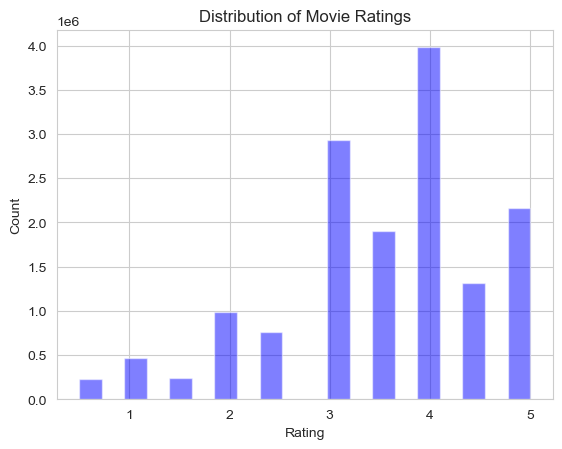

<Figure size 640x480 with 0 Axes>

In [67]:
# Create a histogram of movie ratings
plt.hist(movies_train_set['Rating'], bins=20, color='blue', alpha=0.5)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')

# Display the plot
plt.show()
histogram = plt.gcf()

From the visualization above we can see that more movies are highly rated(3-5) than lowly rated movies(0.5-2.5)

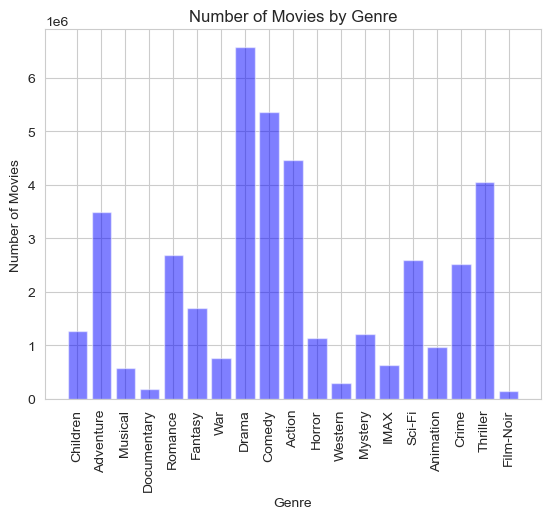

<Figure size 640x480 with 0 Axes>

In [68]:
# Get the counts of movies by genre
genre_counts = movies_train_set.iloc[:,4:].sum()

# Create a bar chart of movie counts by genre
plt.bar(genre_counts.index, genre_counts.values, color='blue', alpha=0.5)

# Set the x-axis label
plt.xlabel('Genre')

# Set the y-axis label
plt.ylabel('Number of Movies')

# Set the plot title
plt.title('Number of Movies by Genre')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()
bar_chart = plt.gcf()

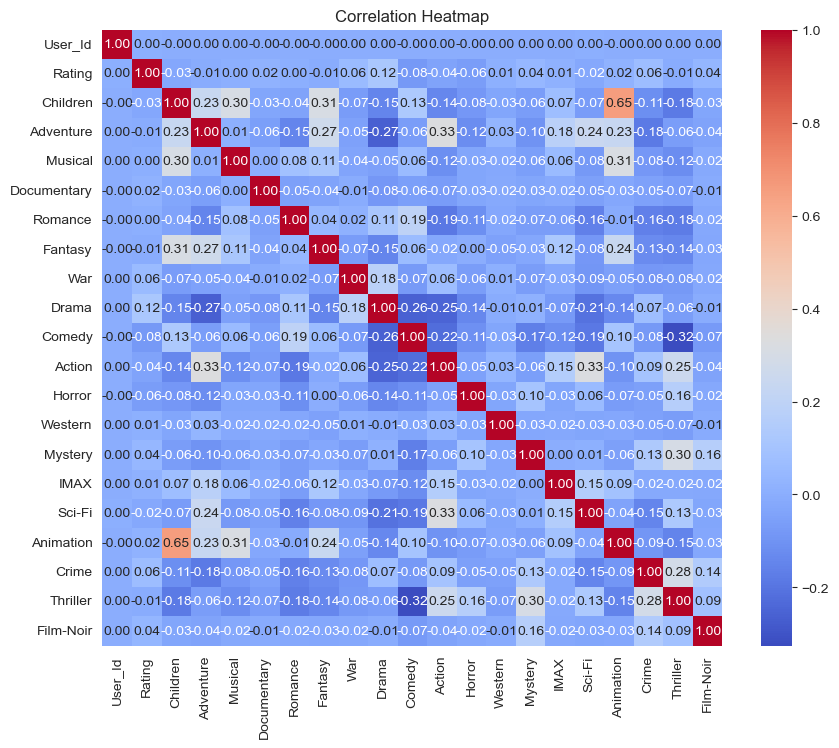

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(movies_train_set.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
heat_map = plt.gcf()

In [56]:
#Compute the average rating and and the number of ratings for each mocie
movie_stats = data.groupby('Movie_Name').agg({'Rating' :['mean' ,'count']})

#Flatten the column names of the resulting dataframe
movie_stats.columns = ['_'.join(col).strip() for col in movie_stats.columns.values]

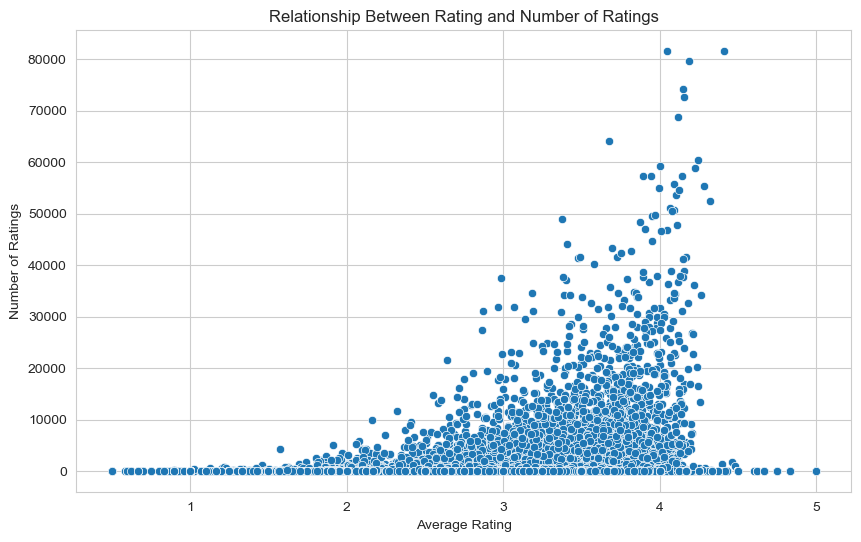

In [70]:
#Create a scatter plot using seaborn
sns.set_style ('whitegrid')
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Rating_mean' ,y='Rating_count' ,data=movie_stats)

#Set the chart title and axis labels
ax.set_title('Relationship Between Rating and Number of Ratings')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Ratings')
scatter_plot = plt.gcf()

The plot shows that there is a positive correlation between the average rating and the number of ratings for each movie. This means that movies that have higher average ratings tend to have more ratings overall.

There are also some outliers in the plot, which could indicate that there are some movies that are highly rated but have not received many ratings. On the other hand, there are also some movies that have received a lot of ratings but have lower average ratings.

Overall, this plot can provide useful insights into which movies are most popular and which movies are highly rated, which can be useful for making recommendations or for marketing purposes.

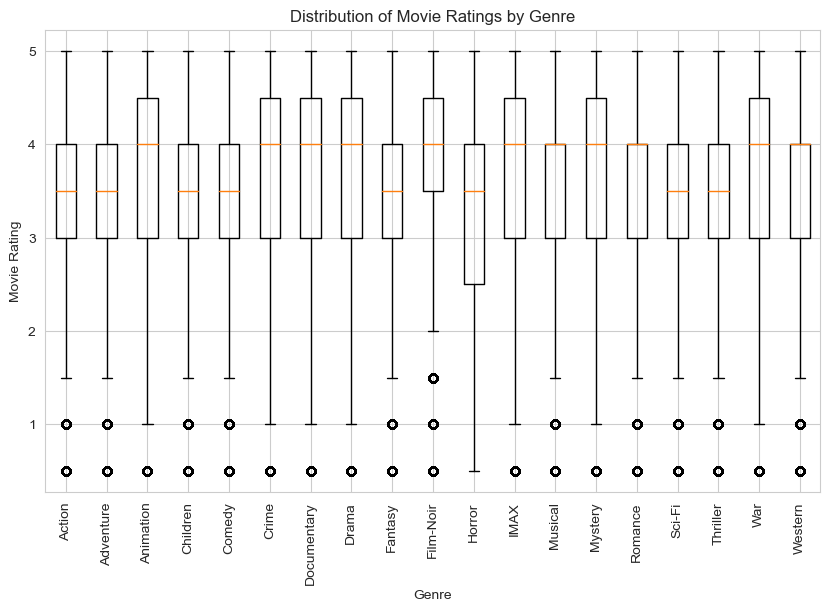

<Figure size 640x480 with 0 Axes>

In [71]:
# create a list of all genre columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX','Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# create a boxplot for each genre column
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([movies_train_set[movies_train_set[col]==1]['Rating'] for col in genre_cols],
           labels=genre_cols)
ax.set_title('Distribution of Movie Ratings by Genre')
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Genre')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()
box_plot = plt.gcf()